<a href="https://colab.research.google.com/github/wesleybeckner/data_science_foundations/blob/main/notebooks/exercises/E2_Inferential_Statistics_Data_Hunt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Foundations <br> Lab 2: Data Hunt II

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_fundamentals/main/assets/datahunt2.png" width=1000px></img>
</p>

<p align=center>
That's right you heard correctly. It's the data hunt part TWO.
</p>





<a name='x.0'></a>

## Preparing Environment and Importing Data

### Import Packages

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 20.6 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [1]:
# our standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import interact

# our stats libraries
import random
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

# our scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Import and Clean Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
                 "technology_fundamentals/main/assets/truffle_rates.csv")
df = df.loc[df['rate'] > 0]

In [3]:
df.head()

base_cake truffle_type      primary_flavor secondary_flavor color_group  \
0   Chiffon  Candy Outer  Cherry Cream Spice      Ginger Beer     Tiffany   
1   Chiffon  Candy Outer  Cherry Cream Spice      Ginger Beer     Tiffany   
2   Chiffon  Candy Outer  Cherry Cream Spice      Ginger Beer     Tiffany   
3   Chiffon  Candy Outer  Cherry Cream Spice      Ginger Beer     Tiffany   
4   Chiffon  Candy Outer  Cherry Cream Spice      Ginger Beer     Tiffany   

       rate  
0  0.167097  
1  0.153827  
2  0.100299  
3  0.333008  
4  0.078108

In [4]:
df.shape

(9210, 6)

## Exploratory Data Analysis

### 🍫 L2 Q1 Finding Influential Features

Which of the five features (base_cake, truffle_type, primary_flavor, secondary_flavor, color_group) of the truffles is most influential on production rate?

Back your answer with both a visualization of the distributions (boxplot, kernel denisty estimate, histogram, violin plot) and a statistical test (moods median, ANOVA, t-test)

* Be sure: 
    * everything is labeled (can you improve your labels with additional descriptive statistical information e.g. indicate mean, std, etc.)
    * you meet the assumptions of your statistical test

#### 🍫 L2 Q1.1 Visualization

Use any number of visualizations. Here is an example to get you started:

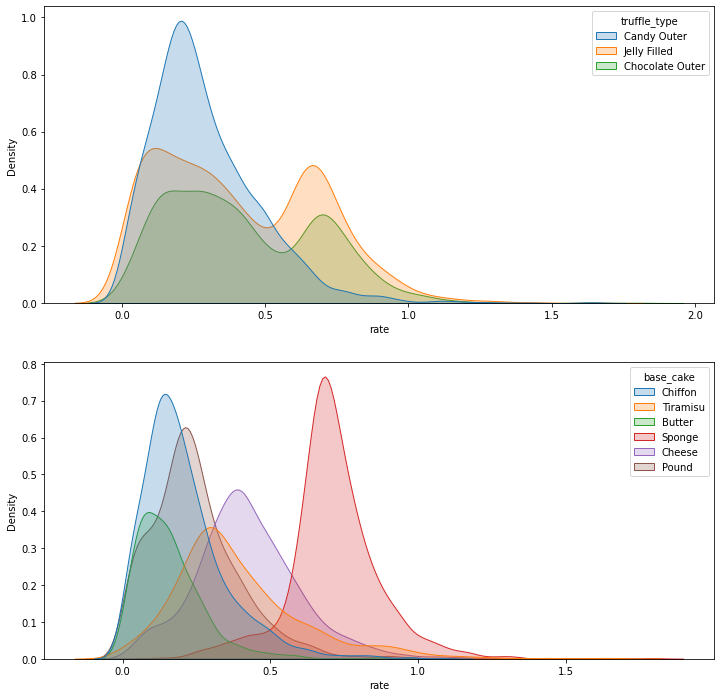

In [ ]:
# Example: a KDE of the truffle_type and base_cake columns

fig, ax = plt.subplots(2, 1, figsize=(12,12))
sns.kdeplot(x=df['rate'], hue=df['truffle_type'], fill=True, ax=ax[0])
sns.kdeplot(x=df['rate'], hue=df['base_cake'], fill=True, ax=ax[1])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/

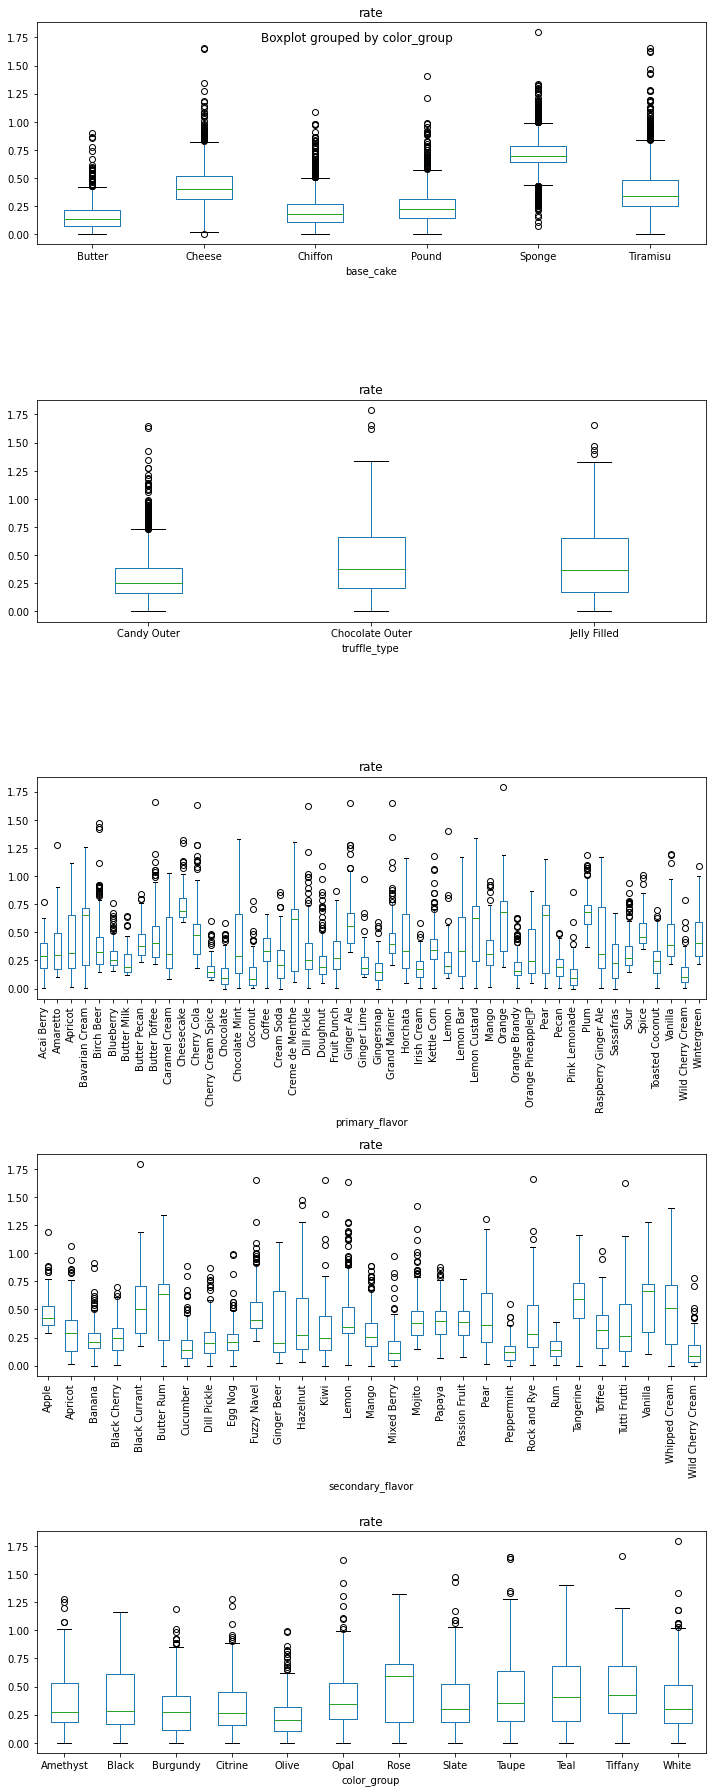

#### 🍫 L2 Q1.2 Statistical Analysis

What statistical tests can you perform to evaluate your hypothesis from the visualizations (maybe you think one particular feature is significant). Here's an ANOVA on the `truffle_type` column to get you started:



In [ ]:
model = ols('rate ~ C({})'.format('truffle_type'), data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

sum_sq      df        F         PR(>F)
C(truffle_type)   36.383370     2.0  302.005  9.199611e-128
Residual         554.596254  9207.0      NaN            NaN

> Is this P value significant? What is the null hypothesis? How do we check the assumptions of ANOVA? 

base_cake


sum_sq      df            F  PR(>F)
C(base_cake)  331.373550     5.0  2349.684756     0.0
Residual      259.606073  9204.0          NaN     NaN

Shapiro:  0.9281061887741089 0.0
Bartlett:  619.3727153356931 1.3175663824168166e-131

truffle_type


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



sum_sq      df        F         PR(>F)
C(truffle_type)   36.383370     2.0  302.005  9.199611e-128
Residual         554.596254  9207.0      NaN            NaN

Shapiro:  0.9645588994026184 1.3704698981096711e-42


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



Bartlett:  533.0206680979852 1.8031528902362296e-116

primary_flavor


sum_sq      df          F  PR(>F)
C(primary_flavor)  159.105452    47.0  71.815842     0.0
Residual           431.874171  9162.0        NaN     NaN

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



Shapiro:  0.9738250970840454 6.485387538059916e-38
Bartlett:  1609.0029005171464 1.848613457353585e-306

secondary_flavor


sum_sq      df          F  PR(>F)
C(secondary_flavor)  115.773877    28.0  79.884192     0.0
Residual             475.205747  9181.0        NaN     NaN

Shapiro:  0.9717048406600952 4.3392384038527993e-39
Bartlett:  1224.4882890761903 3.5546073028894766e-240

color_group


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



sum_sq      df          F         PR(>F)
C(color_group)   33.878491    11.0  50.849974  1.873235e-109
Residual        557.101132  9198.0        NaN            NaN

Shapiro:  0.9598756432533264 1.401298464324817e-44
Bartlett:  298.6432027161358 1.6917844519244488e-57



/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



### 🍫 L2 Q2 Finding Best and Worst Groups



#### 🍫 L2 Q2.1 Compare Every Group to the Whole

Of the primary flavors (feature), what 5 flavors (groups) would you recommend Truffletopia discontinue?

Iterate through every level (i.e. pound, cheese, sponge cakes) of every category (i.e. base cake, primary flavor, secondary flavor) and use moods median testing to compare the group distribution to the grand median rate.

(98, 10)


After you've computed a moods median test on every group, filter any data above a significance level of 0.05

(76, 10)


Return the groups with the lowest median performance (your table need not look exactly like the one I've created)

descriptor  ...                        table
0     primary_flavor  ...     [[12, 4593], [88, 4517]]
1   secondary_flavor  ...     [[12, 4593], [88, 4517]]
2     primary_flavor  ...      [[6, 4599], [79, 4526]]
3     primary_flavor  ...     [[11, 4594], [80, 4525]]
4     primary_flavor  ...      [[7, 4598], [63, 4542]]
5   secondary_flavor  ...    [[28, 4577], [233, 4372]]
6   secondary_flavor  ...      [[5, 4600], [81, 4524]]
7          base_cake  ...    [[75, 4530], [830, 3775]]
8   secondary_flavor  ...      [[6, 4599], [87, 4518]]
9   secondary_flavor  ...    [[33, 4572], [255, 4350]]
10    primary_flavor  ...    [[17, 4588], [175, 4430]]
11    primary_flavor  ...      [[9, 4596], [91, 4514]]
12    primary_flavor  ...    [[26, 4579], [160, 4445]]
13    primary_flavor  ...    [[18, 4587], [133, 4472]]
14         base_cake  ...  [[334, 4271], [1487, 3118]]
15    primary_flavor  ...     [[18, 4587], [82, 4523]]
16    primary_flavor  ...    [[65, 4540], [235, 4370]]
17    primary_flavor  ...     [[23, 4582], [77, 4528]]
18    primary_flavor  ...     [[14, 4591], [75, 4530]]
19  secondary_flavor  ...    [[56, 4549], [185, 4420]]

[20 rows x 10 columns]

We would want to cut the following primary flavors. Check to see that you get a similar answer. rip wild cherry cream.

```
['Coconut', 'Pink Lemonade', 'Chocolate', 'Wild Cherry Cream', 'Gingersnap']
```

['Coconut', 'Pink Lemonade', 'Chocolate', 'Wild Cherry Cream', 'Gingersnap']

#### 🍫 L2 Q2.2 Beyond Statistical Testing: Using Reasoning

Let's look at the total profile of the products associated with the five worst primary flavors. Given the number of different products made with any of these flavors, would you alter your answer at all?

In [ ]:
# 1. filter df for only bottom five flavors
# 2. groupby all columns besides rate
# 3. describe the rate column.

# by doing this we can evaluate just how much sampling variety we have for the
# worst performing flavors.

bottom_five = ['Coconut', 'Pink Lemonade', 'Chocolate', 'Wild Cherry Cream', 'Gingersnap']
df.loc[df['primary_flavor'].isin(bottom_five)].groupby(list(df.columns[:-1]))['rate'].describe()

count  ...       max
base_cake truffle_type    primary_flavor    secondary_flavor  color_group         ...          
Butter    Jelly Filled    Pink Lemonade     Butter Rum        Rose          85.0  ...  0.860045
Chiffon   Candy Outer     Wild Cherry Cream Rock and Rye      Olive         17.0  ...  0.229933
          Chocolate Outer Gingersnap        Dill Pickle       Burgundy      59.0  ...  0.401387
          Jelly Filled    Chocolate         Tutti Frutti      Burgundy      91.0  ...  0.586570
Pound     Candy Outer     Coconut           Wild Cherry Cream Taupe        100.0  ...  0.775210
          Chocolate Outer Gingersnap        Rock and Rye      Black         67.0  ...  0.551898
          Jelly Filled    Gingersnap        Kiwi              Taupe         66.0  ...  0.593016
                          Wild Cherry Cream Mango             Taupe         53.0  ...  0.787224

[8 rows x 8 columns]

#### 🍫 L2 Q2.3 The Jelly Filled Conundrum

Your boss notices the Jelly filled truffles are being produced much faster than the candy outer truffles and suggests expanding into this product line. What is your response? Use the visualization tool below to help you think about this problem, then create any visualizations or analyses of your own.

[sunburst charts](https://plotly.com/python/sunburst-charts/)

In [ ]:
def sun(path=[['base_cake', 'truffle_type', 'primary_flavor', 'secondary_flavor', 'color_group'],
              ['truffle_type', 'base_cake', 'primary_flavor', 'secondary_flavor', 'color_group']]):
  fig = px.sunburst(df, path=path, 
                    color='rate', 
                    color_continuous_scale='viridis',
                    )

  fig.update_layout(
      margin=dict(l=20, r=20, t=20, b=20),
      height=650
  )
  fig.show()

In [ ]:
interact(sun)

interactive(children=(Dropdown(description='path', options=(['base_cake', 'truffle_type', 'primary_flavor', 's…

<function __main__.sun>